LinerRegression 线性二元回归
1、梯度下降法

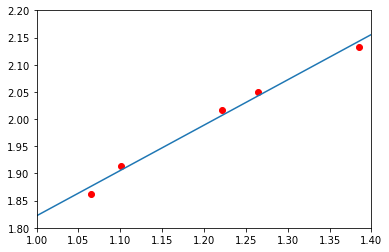

In [2]:
import numpy as np
#a,b为一个数，x,y为np.array形式数列
def model(a,b,x):#计算yi
    return a*x + b
def cost_function(a,b,x,y):#计算损失函数
    return 0.5 * (np.square(y-a*x-b)).sum()
def optimize(a,b,x,y): #取最优
    alpha = 1e-1
    y_hat = model(a,b,x)
    da = ((y_hat-y)*x).sum()
    db = (y_AShat-y).sum()
    a = a-alpha*da
    b = b-alpha*db
    return a,b
x = [1.3854,1.2213,1.1009,1.0655,1.2643]
y = [2.1332,2.0162,1.9138,1.8621,2.05]
x = np.array(x)
y = np.array(y)
import matplotlib.pyplot as plt
a, b = 0, 0
for n in range(10000):
    a, b = optimize(a,b,x,y)

plt.plot(x,y,'ro')
plt.xlim(1,1.4)
plt.ylim(1.8, 2.2)
x1 = np.arange(0,2,0.1)
y1 = a*x1 + b
#print(a,b)
plt.plot(x1,y1)
plt.show()
#print(cost_function(a,b,x,y))

2、最小二乘法

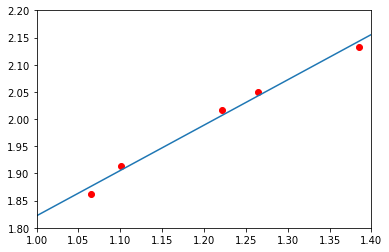

In [99]:
import numpy as np
import matplotlib.pyplot as plt
def Regres(x,y):
    xMat = np.mat(x)
    yMat = np.mat(y).T
    xTx = xMat.T*xMat
    #print(xTx)
    if np.linalg.det(xTx) == 0.0:
        print("行列式为0，奇异矩阵，不能求逆")
        #xTx = xTx + 0.01*np.eye(xTx.shape[0])
    #print(xTx)
    w = xTx.I*(xMat.T*yMat)
    return w
x = [[1,1.3854],[1,1.2213],[1,1.1009],[1,1.0655],[1,1.2643]]
y = [2.1332,2.0162,1.9138,1.8621,2.05]
x = np.mat(x)
y = np.mat(y)
weight = Regres(x,y)
y_pre = x*weight
plt.plot(x.T[1],y,'ro')
plt.xlim(1,1.4)
plt.ylim(1.8, 2.2)
x1 = np.arange(0,2,0.1)
y1 = weight[1]*x1 + weight[0]
#print(a,b)
plt.plot(x1,y1.T)
plt.show()

多元线性回归

[[0.00026214]]


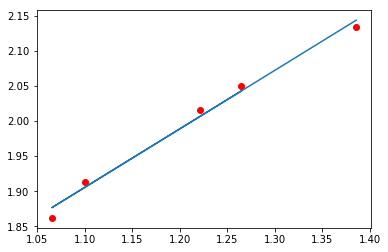

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def cost(x,y,w):
    x=np.mat(x)
    y=np.mat(y)
    w=np.mat(w)
    return 1/2*(x*w-y).T*(x*w-y)
def Regres(x,y):
    '''
    x:m*n np.array
    y:m*1 np.array
    '''
    x = np.mat(x)
    y = np.mat(y)
    xTx = x.T*x
    if np.linalg.det(xTx) == 0.0:
        print("行列式为0，奇异矩阵，不能求逆")
    return xTx.I*(x.T*y)
def predict(weight, x):
    return(x*weight)
x = [1.3854,1.2213,1.1009,1.0655,1.2643]
y = [2.1332,2.0162,1.9138,1.8621,2.05]
x1 = np.array(x)
b = np.ones(len(x))
x1 = np.column_stack((b,x1))
y1 = np.array(np.mat(y).T)

weights = Regres(x1,y1)
y_pre = (predict(weights, x1)).reshape((1,5)).tolist()[0]
plt.plot(x,y,'ro')
plt.plot(x,y_pre)
print(cost(x1,y1,weights))
plt.show()

局部线性回归 *最小二乘法

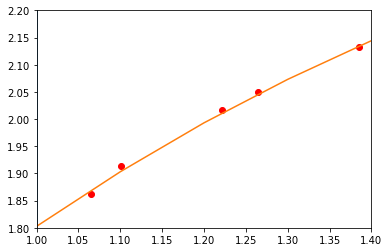

In [31]:
import numpy as np
import matplotlib.pyplot as plt
def Regres(testpoint, x,y,k = 0.1):
    xMat = np.mat(x)
    yMat = np.mat(y)
    weights = np.mat(np.eye(xMat.shape[0]))
    for j in range(xMat.shape[0]):
        distance = testpoint-xMat[j,:]
        weights[j,j] = np.exp(distance*distance.T/(-2.0*k**2))
    xTx = xMat.T*(weights*xMat)
    #print(xTx)
    if np.linalg.det(xTx) == 0.0:
        print("行列式为0，奇异矩阵，不能求逆")
        #xTx = xTx + 0.01*np.eye(xTx.shape[0])
        return
    #print(xTx,xMat,weights,yMat)
    w = xTx.I*(xMat.T*(weights*yMat))
    return testpoint*w
def predict(test, x,y,k = 0.1):
    pre = np.zeros(test.shape[0])
    for n in range(test.shape[0]):
        pre[n]=(Regres(test[n], x,y,k))
    return pre
    
    
x = [[1,1.3854],[1,1.2213],[1,1.1009],[1,1.0655],[1,1.2643]]
y = [2.1332,2.0162,1.9138,1.8621,2.05]

x = np.array(x)
y = np.array(y)
import matplotlib.pyplot as plt


plt.plot(x.T[1],y,'ro')
plt.xlim(1,1.4)
plt.ylim(1.8, 2.2)
x1 = np.arange(0,2,0.1)
x2 = np.ones(len(x1))
x1 = np.column_stack((x2,x1))
y_pre = predict(x1,x,np.mat(y).T,k=0.1)
#print(y_pre)
plt.plot(x1,y_pre)
plt.show()
#print(cost_function(a,b,x,y))

局部线性回归 *梯度下降法

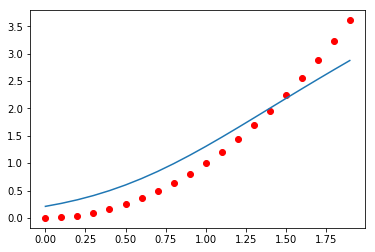

[[1.12566472]]


In [34]:
import numpy as np
#a,b为一个数，x,y为np.array形式数列
def model(weights,x):#计算yi
    return np.mat(x)*np.mat(weights)
def cost_function(y_pre,y):#计算损失函数
    return 0.5 * (y_pre-y).T*(y_pre-y)
def optimize_(testpoint,w,x,y,k,alpha): #取最优 alpha:学习率 ,k:局部线性回归程度
    y_hat = model(w,x)
    weights = np.mat(np.eye(x.shape[0]))
    for j in range(x.shape[0]):
        distance = testpoint-x[j,:]
        distance = np.mat(distance)
        weights[j,j] = np.exp(distance*distance.T/(-2.0*k**2))
    dw = (x.T*weights*(y_hat-y)).sum(axis=0)
    w = w-alpha*dw
    return w
#创建y=x^2的数组，用于测试
x_ = np.arange(0,2,0.1)
y = x_*x_
b=np.ones(len(x_))   # 添加全1列向量代表b偏量
x=np.column_stack((b,x_))
x = np.array(x)
y = np.array(np.mat(y).T)

import matplotlib.pyplot as plt

def Lwlr(test, x,y,k=0.1,alpha = 1e-2,n=100):#test:待预测数据集，x,y训练集， alpha:学习率，n:迭代次数，k:局部线性回归程度
    y_pre=[]
    for testpoint in test:
        w = np.zeros((x.shape[1],1))
        for n in range(n):
            w = optimize_(testpoint,w,x,y,k,alpha)
        y_testpoint = model(w,testpoint).tolist()[0][0]
        
        y_pre.append(y_testpoint)
    return y_pre
#print(x.T[1])
plt.plot(x.T[1],y,'ro')
y1 = Lwlr(x,x,y,k=0.1)
plt.plot(x.T[1],y1)
plt.show()
y_pre = np.mat(y1).T
print(cost_function(y_pre,y))

岭回归 *采用最小二乘

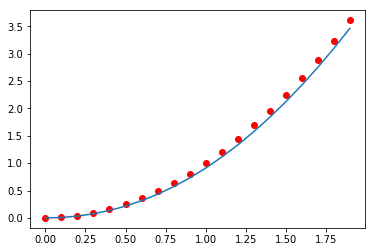

In [17]:
import numpy as np
import matplotlib.pyplot as plt
def Regres(testpoint, x,y,k = 0.1,lamda=0.05):
    xMat = np.mat(x)
    yMat = np.mat(y)
    weights = np.mat(np.eye(xMat.shape[0]))
    for j in range(xMat.shape[0]):
        distance = testpoint-xMat[j,:]
        weights[j,j] = np.exp(distance*distance.T/(-2.0*k**2))
    xTx = xMat.T*(weights*xMat)
    #print(xTx)
    xTx = xTx + lamda*np.eye(xTx.shape[0])
    
    #print(xTx,xMat,weights,yMat)
    w = xTx.I*(xMat.T*(weights*yMat))
    return testpoint*w
#test:待预测数据集，x,y训练集， lamda:Ridge拟合系数（越低越拟合）k:局部线性回归系数（越低越拟合）
def predict(test, x,y,k = 0.1,lamda = 0.05):
    pre = np.zeros(test.shape[0])
    for n in range(test.shape[0]):
        pre[n]=(Regres(test[n], x,y,k,lamda))
    return pre
    
x_ = np.arange(0,2,0.1)
y = x_*x_
b=np.ones(len(x_))   # 添加全1列向量代表b偏量
x=np.column_stack((b,x_))
x = np.array(x)
y = np.mat(y).T
import matplotlib.pyplot as plt
#print(x,y)
plt.plot(x_,y,'ro')
x1 = np.arange(0,2,0.1)
x2 = np.ones(len(x1))
x1 = np.column_stack((x2,x1))
y_pre = predict(x1,x,y,k=0.001,lamda=0.2)
#print(x1)
plt.plot(x_,y_pre)
plt.show()
#print(cost_function(a,b,x,y))

Lasso回归 *梯度下降法 #个人感觉还有点问题，没有岭回归降噪效果好 且算法所需时间较长 在y比较小的时候lamda不能取用大的，会变形

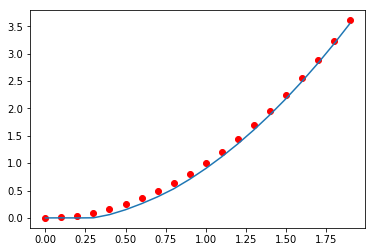

[[0.06947772]]


In [145]:
import numpy as np
def dif(W,k):
    w = np.array(W)
    w[W>0] = 1
    w[W<0] = -1
    return k*w
#a,b为一个数，x,y为np.array形式数列
def model(weights,x):#计算yi
    return np.mat(x)*np.mat(weights)
def cost_function(y_pre,y):#计算损失函数
    return 0.5 * (y_pre-y).T*(y_pre-y)
def optimize_Lasso(testpoint,w,x,y,k,alpha,lamda): #取最优 alpha:学习率 
    y_hat = model(w,x)
    weights = np.mat(np.eye(x.shape[0]))
    for j in range(x.shape[0]):
        distance = testpoint-x[j,:]
        distance = np.mat(distance)
        weights[j,j] = np.exp(distance*distance.T/(-2.0*k**2))
    dw = (x.T*weights*(y_hat-y))
    w -= alpha*dw + dif(w,lamda)
    return w
#创建y=x^2的数组，用于测试
x_ = np.arange(0,2,0.1)
y = x_*x_
b=np.ones(len(x_))   # 添加全1列向量代表b偏量
x=np.column_stack((b,x_))
x = np.array(x)
y = np.array(np.mat(y).T)

import matplotlib.pyplot as plt

#test:待预测数据集，x,y训练集， alpha:学习率，lamda:Lasso拟合系数（越低越拟合）k:局部线性回归系数（越低越拟合），n:迭代次数
def Lasso(test, x,y,k=0.1,alpha = 1e-2,n=100,lamda=0.001):
    y_pre=[]
    for testpoint in test:
        w = np.zeros((x.shape[1],1))
        for n in range(n):
            w = optimize_Lasso(testpoint,w,x,y,k,alpha,lamda)
        y_testpoint = model(w,testpoint).tolist()[0][0]
        
        y_pre.append(y_testpoint)
    return y_pre
#print(x.T[1])
plt.plot(x.T[1],y,'ro')
y1 = Lasso(x,x,y,k=0.001,lamda=0.001,n=1000)
plt.plot(x.T[1],y1)
plt.show()
y_pre = np.mat(y1).T
print(cost_function(y_pre,y))

logistic:二元回归

真实数据：


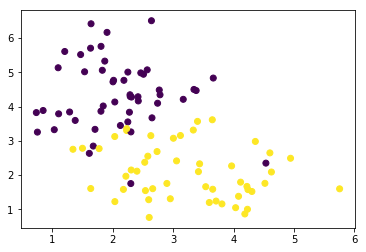

训练数据：


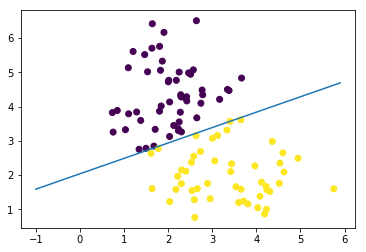

In [22]:
from sklearn import datasets
import matplotlib.pyplot as plt
def logistic(x,y,weight):
    index = -np.dot(np.mat(x),np.mat(weight).T)
    index = index.tolist()[0][0]
    return 1/(1+np.exp(index))
def logistic_regression(x, y, alpha=0.01, n=1000):
    weight = np.ones((1,np.shape(x)[1]))
    for i in range(n):
        for j in range(np.shape(x)[0]):
            weight += alpha*(y[j]-logistic(x[j],y[j],weight))*x[j]
    return weight

#创建数据
x,y = datasets.make_blobs(n_samples = 100, n_features = 2, centers = 2, center_box = (0,5.0))

def data_convert(x,y):
    b=np.ones(y.shape)   # 添加全1列向量代表b偏量
    x_b=np.column_stack((b,x)) # b与x矩阵拼接
    return x_b,y

#展示这些坐标
x,y = data_convert(x,y)
print('真实数据：')
show(x[:,1],x[:,2],y)
weight=logistic_regression(x,y)
y_pre = 1/(1+np.exp(-x.dot(weight.T)))
predict = []
print('训练数据：')
for n in range(x.shape[0]):
    if y_pre[n][0]>0.5:
        predict.append(1)
    else:
        predict.append(0)
w = weight.tolist()[0]
x_ = np.arange(-1,6,0.1)
y = -(w[0]+w[1]*x_)/w[2]
plt.scatter(x[:,1],x[:,2],c=predict)
plt.plot(x_,y)
plt.show()

softmax多元分类回归

真实数据：


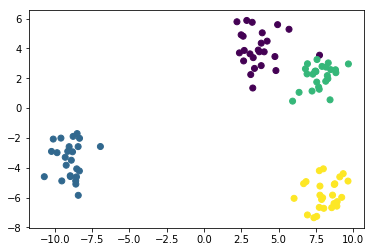

预测数据：


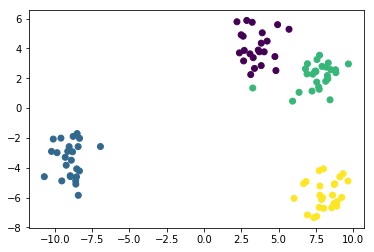

In [28]:
import matplotlib.pyplot as plt
from sklearn import datasets
#返回概率
def p(s):
    return np.exp(s) / np.sum(np.exp(s), axis=1)
#数据处理
def data_convert(x,y):
    b=np.ones(y.shape)   # 添加全1列向量代表b偏量
    x_b=np.column_stack((b,x)) # b与x矩阵拼接
    return x_b,y
#softmax
def softmax(x, y,k, alpha=0.01, n = 10000):#学习率默认0.01，迭代次数默认10000
    weights = np.ones((np.shape(x)[1],k))
    for i in range(n):
        #求概率矩阵
        err = -p(np.dot(np.mat(x),weights))
        #当xi=j时对该位置加一
        for j in range(np.shape(x)[0]):
            err[j,y[j]] += 1
        #返回系数
        weights += (alpha/np.shape(x)[0])*np.dot(x.T , err)
    return weights
#展示函数
def show(x1,x2,label):
    plt.scatter(x1,x2,c=label)
    plt.show()
    
#随机生成四类坐标
x,y = datasets.make_blobs(n_samples = 100, n_features = 2, centers = 4, center_box = (-10.0,10.0))
#展示这些坐标
print('真实数据：')
show(x[:,0],x[:,1],y)
#对x,y进行处理，就是对x加上全为1的常数列，即x^0次方项
X,Y=data_convert(x,y)
k = len(np.unique(list(y))) #k为数据所含类别
weights = softmax(X,Y,k,n=5000)
# 预测网格点上的值
y1 = p(np.mat(X)*weights)   #输出每个样本属于每个分类的概率
# 判断所属的分类
predicted = y1.argmax(axis=1) 
print('预测数据：')
show(x[:,0],x[:,1],np.array(predicted).T[0])

以下对softmax进行大数据集训练，此处用了一个关于手写阿拉伯数字的数据集，有0,1,2...,9十个类别

In [237]:
import pandas as pd
train_data = pd.read_csv(r'D:\python data\手写数字数据集\train1.csv')#此数据集为阿拉伯数字手写扫描数据集。
X_model = train_data.drop('label',axis = 1)
Y_model = train_data['label'].copy()

#因为这个数据集的行向量有784维，且0元素较多，因此采取每4个加和等于0记为0，不等于0记为1，压缩成196维向量。
def reset_data(Data):
    X_ = []
    for n in X_model.values:
        x = []
        count=0
        sum_ = 0
        for i in n:
            count+=1
            if count%4!=0:
                sum_+=i
            else:
                if sum_ == 0:
                    x.append(0)
                else:
                    x.append(1)
                sum_ = 0
        X_.append(x)
    X_ = np.array(X_)
    return X_

In [238]:
#多元线性回归 softmax进行训练
X_model = reset_data(X_model)
X,Y=data_convert(X_model,Y_model)
k = len(np.unique(list(Y_model))) #k为数据所含类别
weights = softmax(X,Y,k)
y1 = p(np.mat(X)*weights) 
predicted = y1.argmax(axis=1) 

In [239]:
#查看准确率
count = 0
for y, y_pre in zip(Y_model, predicted):
    if y == y_pre:
        count+=1
print("准确率:",count/len(Y_model))

准确率: 0.9119119119119119
